In [2]:
from time import time
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('./csv/database_balanced_cf.csv')

X = df.drop(columns=['activity'])
y = df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP, max_iter num maximo de épocas, early stopping quando o aprendizado atinge o cap,
# validation_fraction separa uma parte do set de treino para validar a performance, 
# n_iter_no_change o número de épocas sem melhora no MLP.
mlp = MLPClassifier(max_iter=100, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

# parâmetros para serem utilizados pelo gridSearch e randomSearch
# hidden_layer é o tamanho da rede neural, activation a função de ativação do neuronio
# solver se refere a otimização dos pesos, alpha é o coeficiente de correção dos pesos
# e realiza a correção a cada época, learning_rate 
param = {
    "hidden_layer_sizes": [(50, 50), (100, 100), (200, 200)],
    "activation": ["relu", "tanh", "identity", "logistic"],
    "solver": ["adam", "lbfgs", "sgd"],
    "alpha": [0.00001 ,0.0001, 0.001, 0.01, 0.1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
}

# RandomizedSearch, n_iter_search se refere ao número máximo de buscas aleatórias dentro de param
n_iter_search = 10
random_search = RandomizedSearchCV(
    mlp, param_distributions=param, n_iter=n_iter_search, cv=2, random_state=42, n_jobs=-1
)

start = time()
random_search.fit(X_train, y_train)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

# GridSearch, onde se realiza a busca entre todas as combinações possíveis em param
grid_search = GridSearchCV(mlp, param_grid=param, cv=2, n_jobs=-1)
start = time()
grid_search.fit(X_train, y_train)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

# melhor modelo avaliado pelo GridSearch
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

# loss curve
plt.figure()
plt.plot(best_model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# accuracy curve
if hasattr(best_model, 'validation_scores_'):
    plt.figure() 
    plt.plot(best_model.validation_scores_)
    plt.title('Validation Accuracy Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Validation Accuracy')
    plt.show()


KeyboardInterrupt: 

RandomizedSearchCV took 654.14 seconds for 25 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.918 (std: 0.001)
Parameters: {'activation': 'relu', 'alpha': 0.013615257464006516, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.914 (std: 0.007)
Parameters: {'activation': 'relu', 'alpha': 0.000137832374550072, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.907 (std: 0.003)
Parameters: {'activation': 'relu', 'alpha': 0.006173770394704574, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}

GridSearchCV took 461.54 seconds for 24 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.913 (std: 0.000)
Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}

Model with rank: 2
Mean validati

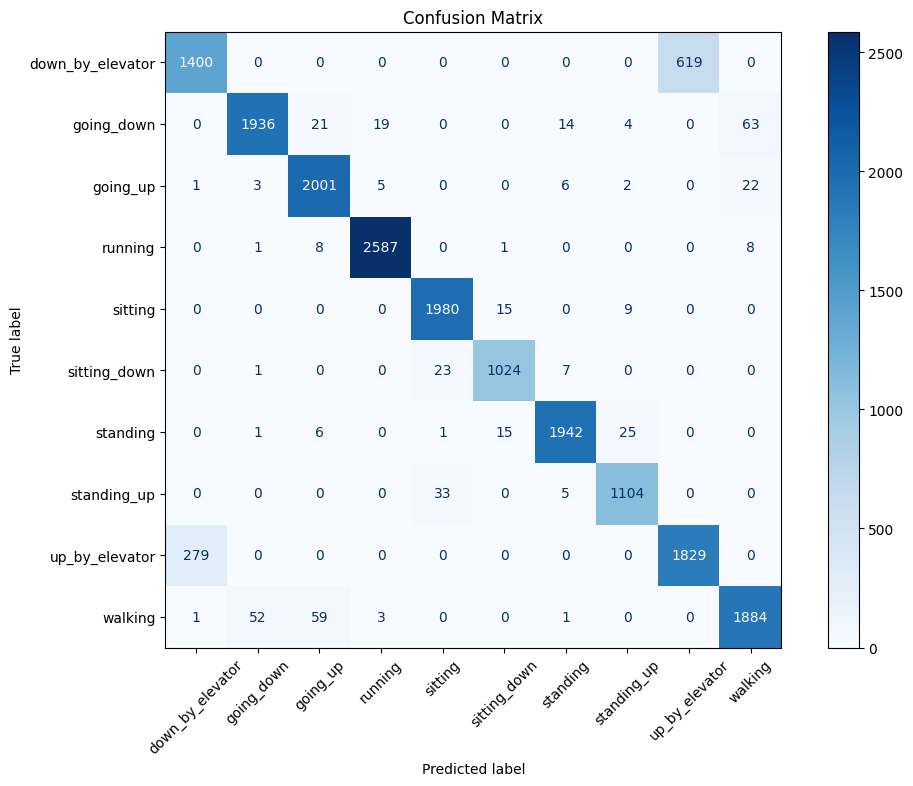

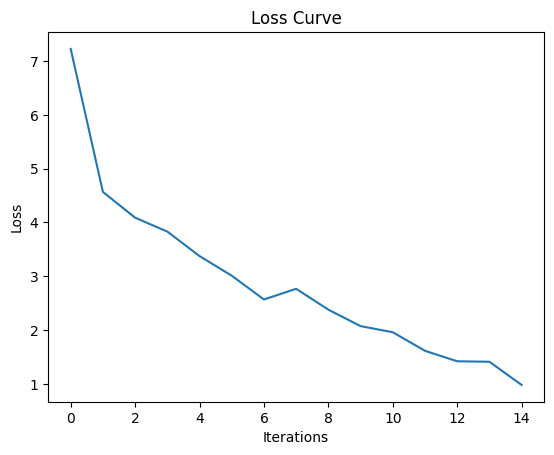

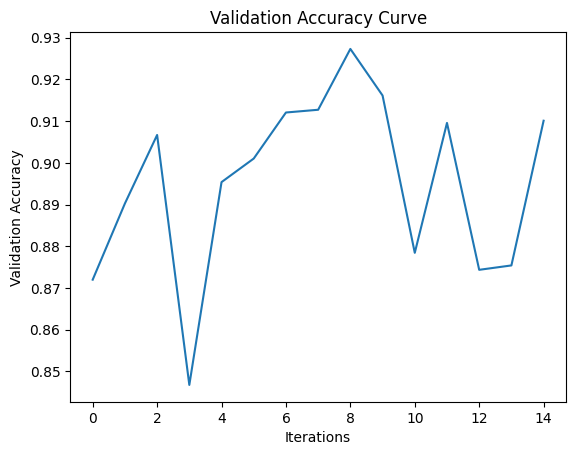

In [ ]:
from time import time
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('./csv/database_balanced_arima.csv')

X = df.drop(columns=['activity'])
y = df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(max_iter=100, early_stopping=True, validation_fraction=0.01, n_iter_no_change=5)

n_iter_search = 25
random_search = RandomizedSearchCV(
    mlp, param_distributions=param, n_iter=n_iter_search, cv=2, random_state=42, n_jobs=-1
)

start = time()
random_search.fit(X_train, y_train)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

grid_search = GridSearchCV(mlp, param_grid=param, cv=2, n_jobs=-1)
start = time()
grid_search.fit(X_train, y_train)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

plt.figure()
plt.plot(best_model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

if hasattr(best_model, 'validation_scores_'):
    plt.figure() 
    plt.plot(best_model.validation_scores_)
    plt.title('Validation Accuracy Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Validation Accuracy')
    plt.show()
